# Things to import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import itertools

In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

train_ids = df_train['Id']
test_ids = df_test['Id']


df_full = pd.concat([df_train,df_test], sort=False)

# EDA

columns with null values

In [3]:
nans = pd.concat([df_train.isnull().sum(),
                  df_train.isnull().sum()/
                  df_train.shape[0], df_test.isnull().sum(),
                  df_test.isnull().sum()/
                  df_test.shape[0]], axis=1,
                 keys=['Train', 'Percentage', 'Test', 'Percentage'],
                sort=False)
print(nans[nans.sum(axis=1) > 0].sort_values(by="Test", ascending=False))

              Train  Percentage    Test  Percentage
PoolQC         1453    0.995205  1456.0    0.997944
MiscFeature    1406    0.963014  1408.0    0.965045
Alley          1369    0.937671  1352.0    0.926662
Fence          1179    0.807534  1169.0    0.801234
FireplaceQu     690    0.472603   730.0    0.500343
LotFrontage     259    0.177397   227.0    0.155586
GarageFinish     81    0.055479    78.0    0.053461
GarageQual       81    0.055479    78.0    0.053461
GarageCond       81    0.055479    78.0    0.053461
GarageYrBlt      81    0.055479    78.0    0.053461
GarageType       81    0.055479    76.0    0.052090
BsmtCond         37    0.025342    45.0    0.030843
BsmtExposure     38    0.026027    44.0    0.030158
BsmtQual         37    0.025342    44.0    0.030158
BsmtFinType1     37    0.025342    42.0    0.028787
BsmtFinType2     38    0.026027    42.0    0.028787
MasVnrType        8    0.005479    16.0    0.010966
MasVnrArea        8    0.005479    15.0    0.010281
MSZoning    

categorical features

In [4]:
for idx in df_train.select_dtypes(include="object").columns:
    print("{}: {}\n".format(idx, set(df_train[idx])))

MSZoning: {'RM', 'RH', 'RL', 'FV', 'C (all)'}

Street: {'Pave', 'Grvl'}

Alley: {nan, 'Pave', 'Grvl'}

LotShape: {'Reg', 'IR3', 'IR1', 'IR2'}

LandContour: {'Lvl', 'Low', 'Bnk', 'HLS'}

Utilities: {'NoSeWa', 'AllPub'}

LotConfig: {'Corner', 'FR2', 'Inside', 'FR3', 'CulDSac'}

LandSlope: {'Sev', 'Gtl', 'Mod'}

Neighborhood: {'NWAmes', 'IDOTRR', 'Sawyer', 'NoRidge', 'Crawfor', 'Gilbert', 'StoneBr', 'Blueste', 'SawyerW', 'ClearCr', 'MeadowV', 'NridgHt', 'Timber', 'Blmngtn', 'BrkSide', 'SWISU', 'OldTown', 'BrDale', 'Veenker', 'Edwards', 'NPkVill', 'Mitchel', 'Somerst', 'NAmes', 'CollgCr'}

Condition1: {'Feedr', 'PosA', 'Artery', 'RRAn', 'Norm', 'RRNe', 'RRAe', 'PosN', 'RRNn'}

Condition2: {'Feedr', 'PosA', 'Artery', 'RRAn', 'Norm', 'RRAe', 'PosN', 'RRNn'}

BldgType: {'Twnhs', 'Duplex', 'TwnhsE', '1Fam', '2fmCon'}

HouseStyle: {'SFoyer', '1.5Unf', '1Story', '2.5Unf', '1.5Fin', 'SLvl', '2.5Fin', '2Story'}

RoofStyle: {'Gable', 'Mansard', 'Hip', 'Gambrel', 'Shed', 'Flat'}

RoofMatl: {'CompShg

Text(0, 0.5, 'SalePrice')

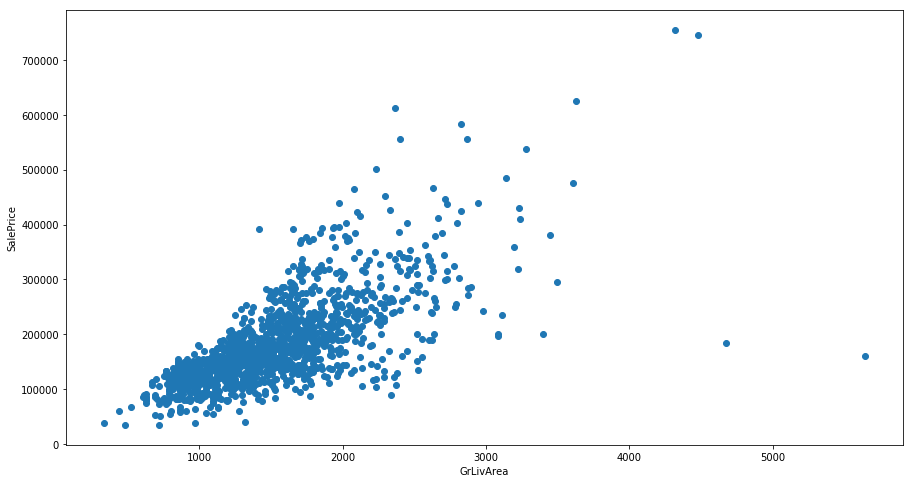

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

```there are 2 big houses with very low price.```

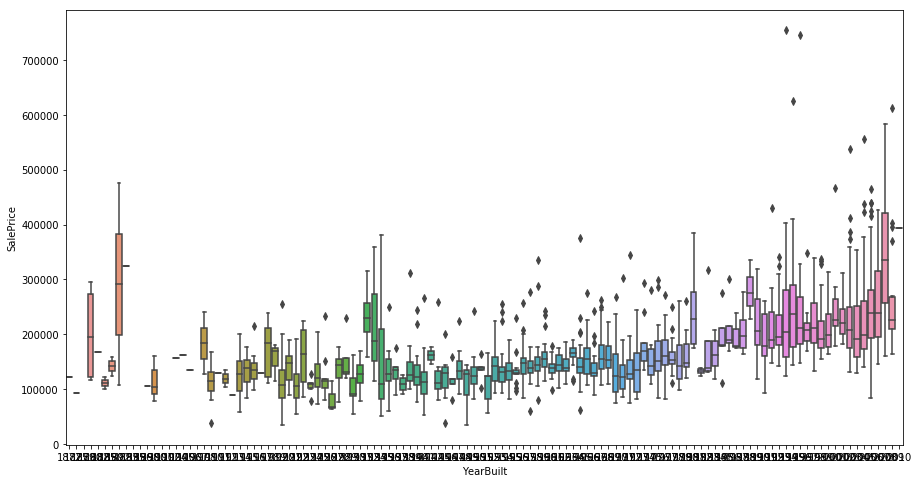

In [7]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_full.YearBuilt, df_full.SalePrice)
plt.show()

```prices increase over years```

In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

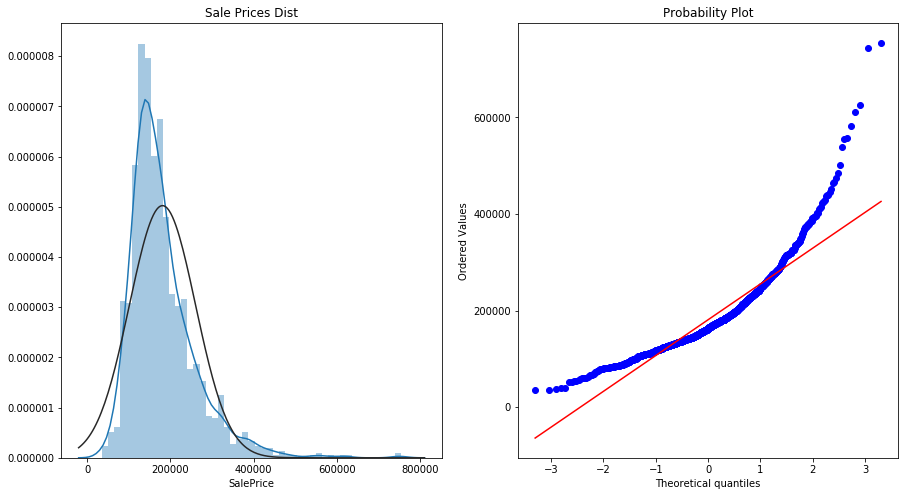

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Sale Prices Dist")
sns.distplot(df_train["SalePrice"], fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(df_train["SalePrice"], plot=plt)
plt.show()

print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

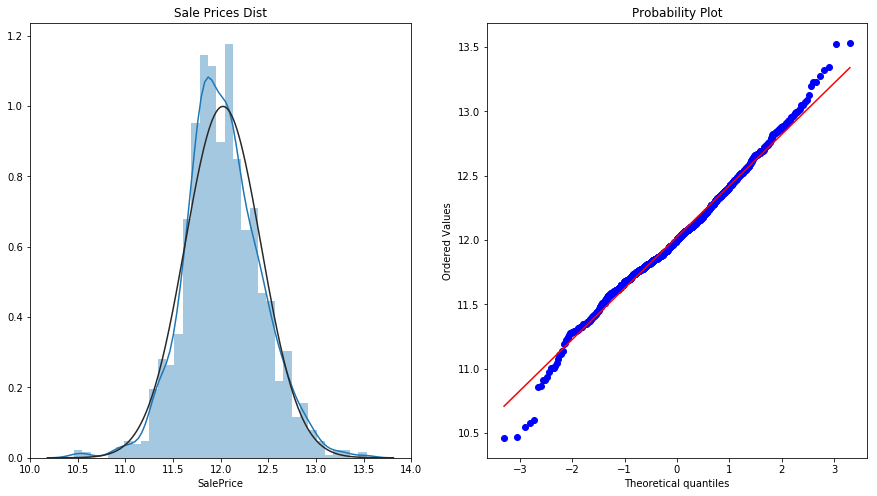

Skewness: 0.121335
Kurtosis: 0.809532


In [10]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Sale Prices Dist")
sns.distplot(np.log(df_train["SalePrice"]), fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(np.log(df_train["SalePrice"]), plot=plt)
plt.show()

print("Skewness: %f" % np.log(df_train["SalePrice"]).skew())
print("Kurtosis: %f" % np.log(df_train["SalePrice"]).kurt())

``` seems like using log values is closer to normal distribution```

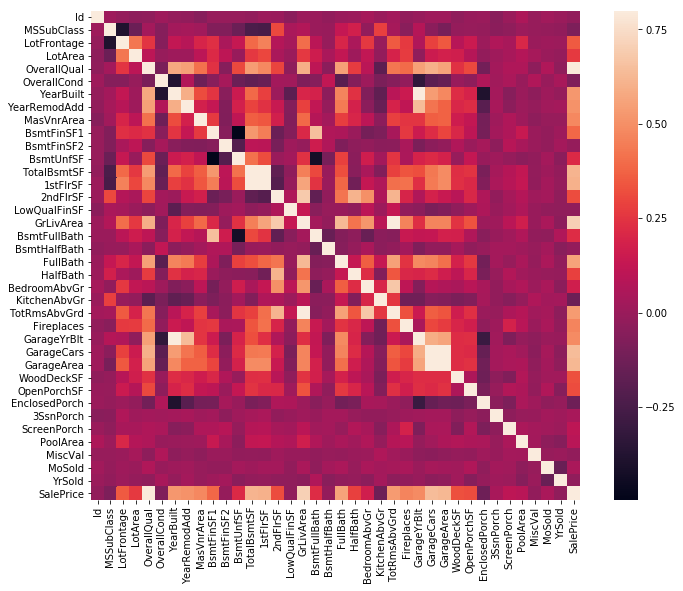

In [12]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

```values related to garage are correlated. alse basement finished area and first floor```

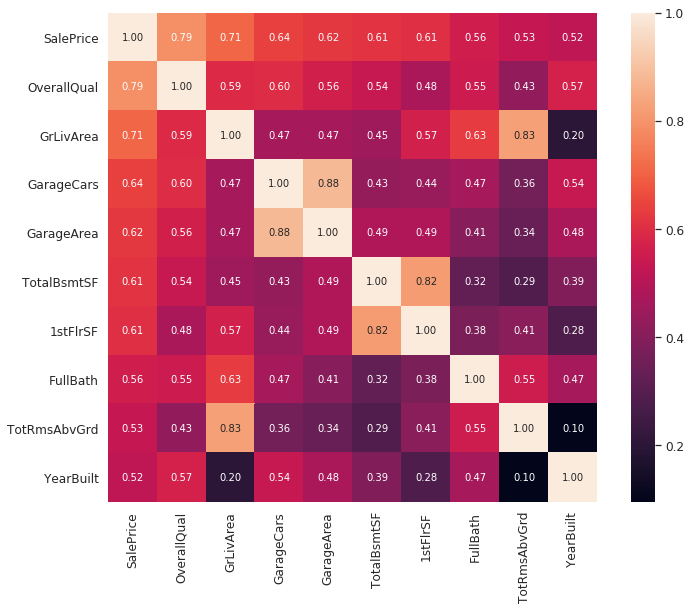

In [13]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.1)
plt.figure(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

<Figure size 1152x648 with 0 Axes>

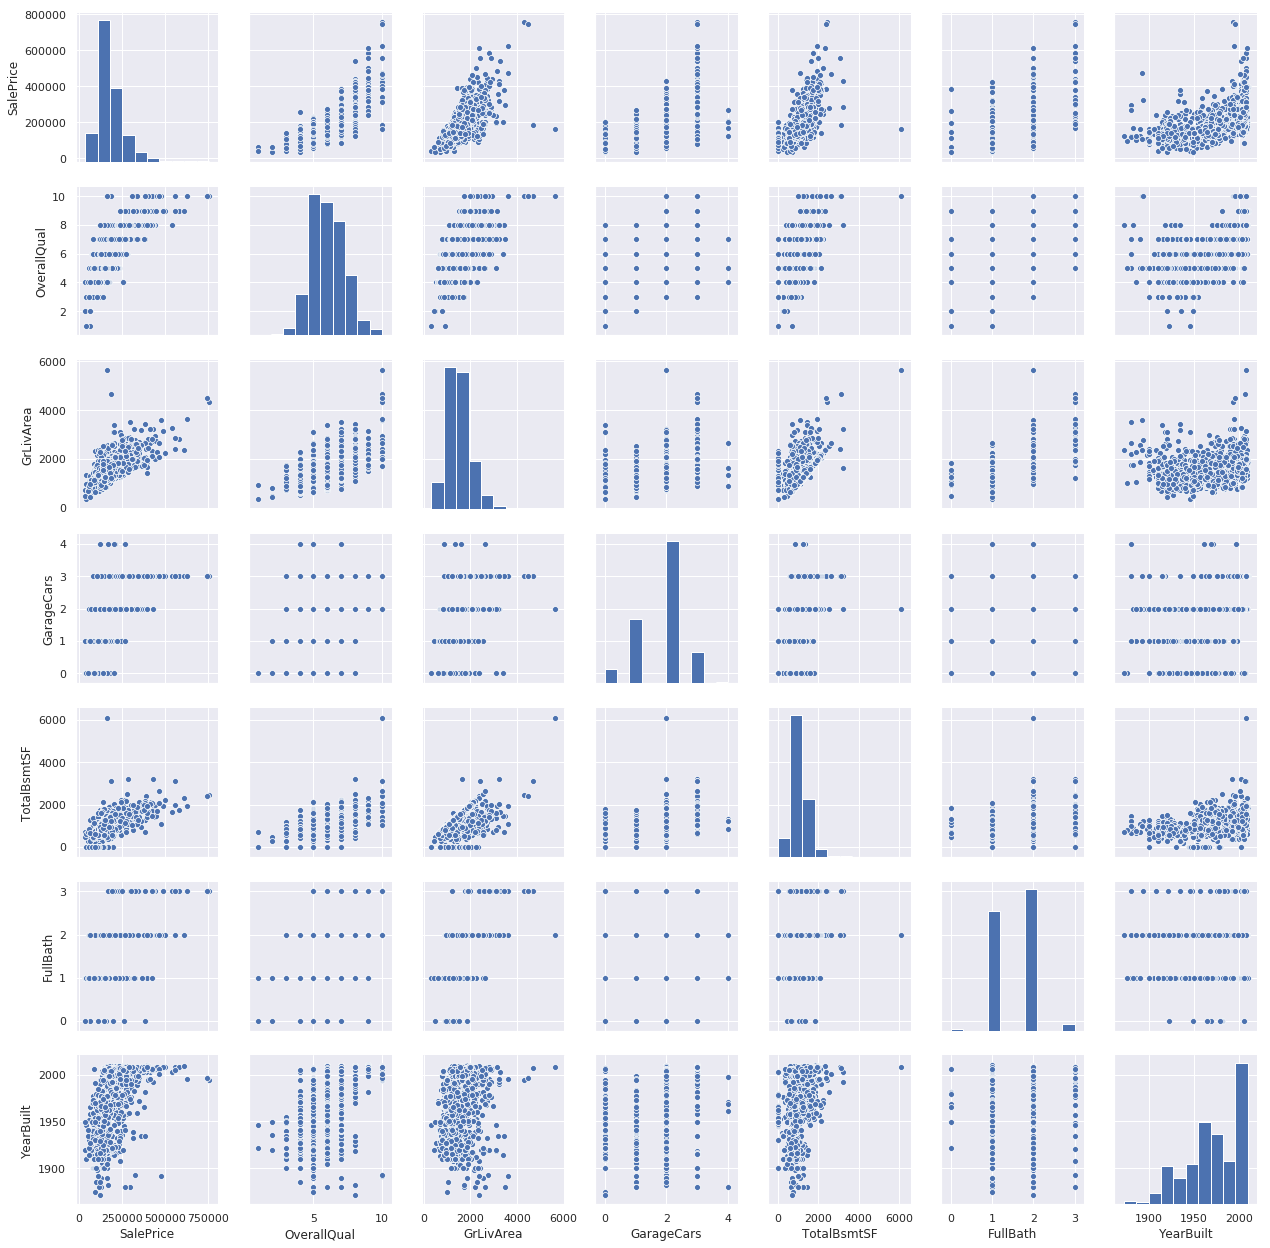

In [17]:
sns.set()
plt.figure(figsize=(16, 9))
cols = ['SalePrice', 'OverallQual','GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height=2.5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


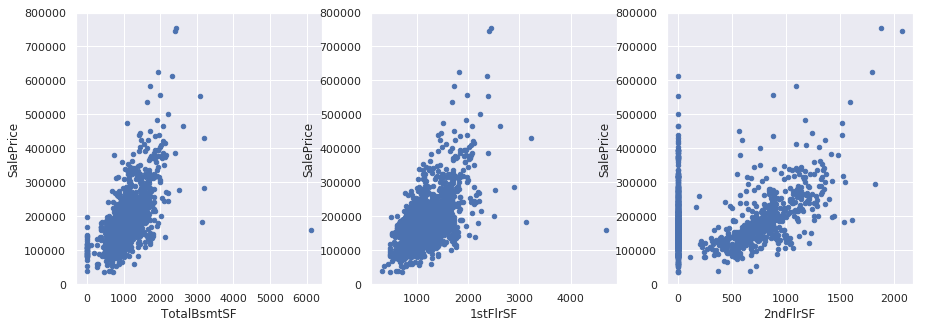

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
data_total = pd.concat([df_train['SalePrice'],
                        df_train['TotalBsmtSF']], axis=1)
data_total.plot.scatter(x='TotalBsmtSF', y='SalePrice',
                        ylim=(0, 800000), ax=ax1)
data1 = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
data1.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax2)
data2 = pd.concat([df_train['SalePrice'], df_train['2ndFlrSF']], axis=1)
data2.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax3)
plt.show()

In [19]:
df_full.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
df_full['TotalBsmtSF'] = df_full['TotalBsmtSF'].fillna(0)
df_full['1stFlrSF'] = df_full['1stFlrSF'].fillna(0)
df_full['2ndFlrSF'] = df_full['2ndFlrSF'].fillna(0)
df_full['TotalSF'] = df_full['TotalBsmtSF']+df_full['1stFlrSF']+df_full['2ndFlrSF']
df_full.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
df_full.drop(['GarageArea'], axis=1, inplace=True) 

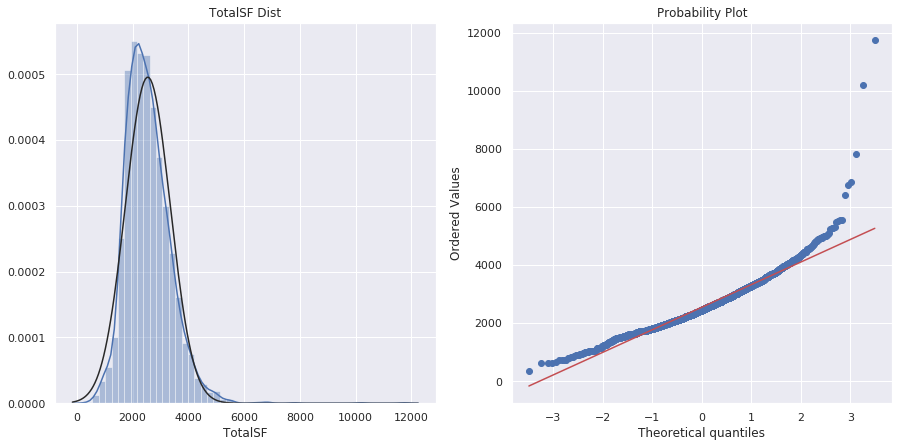

Skewness: 1.512256
Kurtosis: 9.794044


In [22]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("TotalSF Dist")
sns.distplot(df_full['TotalSF'], fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(df_full['TotalSF'], plot=plt)
plt.show()

print("Skewness: %f" % df_full['TotalSF'].skew())
print("Kurtosis: %f" % df_full['TotalSF'].kurt())

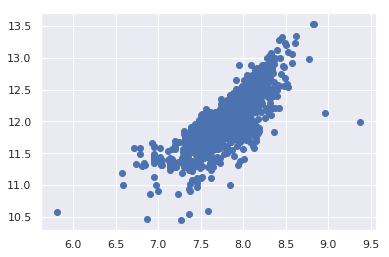

In [23]:
sf = np.log(df_full['TotalSF'])
sp = np.log(df_full['SalePrice'])
plt.scatter(sf[sf > 0], sp[sf > 0])
plt.show()